# Data Science Project

# I] Introduction 

I have implemented the following topics in this project:

 - Implemented a simple pipeline 
 - Developed a storage model for the dataset 
 - Ran an algorithm using a parallel programming framework 
 - Ran predictive analytics on the dataset
 - Proposed a cleaning / quality improvement solution
 - Created a data management plan that describes how this dataset is being collected, stored, preserved, and shared
 
Problem Statement:

1] Create a Recommender system for users based on the star cast of the movie they watched before.

2] Predict the success of the movie by analyzing the sentiments on the reviews.

I have selected MovieLens 100K Dataset. The dataset consists of links.csv, movies.csv,  ratings.csv and tags.csv files. movies.csv file consists of movieId, title, genres of movies, ratings.csv file consists of userId, movieId, rating, timestamp, tags.csv file consists of userId , movieId , tag , timestamp, links.csv file consists of movieId , imdbId , tmdbId. The dataset is structured.

## II] Background 

1] Recommendations to users based on the star cast was selected because 
customers form the main economy and star power brings the audience to the theatres or to the movie screens to watch the movies. 
Content based filtering was used for it. So, recommending the correct movies which would match with the taste of the users would 
enable to keep the audiences intrigued and thereby increase the business.

2] Predict the success of the movie by analyzing the sentiments on the reviews.

This topic was selected because:

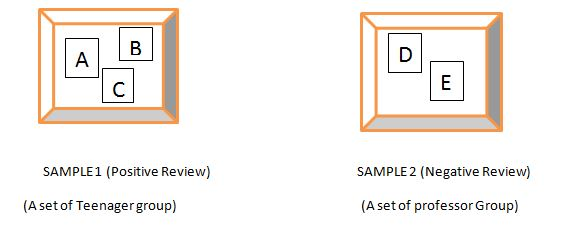

The above diagram shows two Samples. Sample1 represents group of people who wrote positive reviews and Sample2 represents group of people who wrote negative reviews.The samples may consist of people who may have different mindsets and hence different evaluation and perspective towards a particular MOVIE. Therefore, sentiment analysis needs to be done which weighs both the categories (as mentioned above) and then draws conclusions about the movies' success. 

Business Goals (For Producer): 

1] This would result in a profitable deal to the producer, as he would now have a diverse analysis of his Movie faring at the bigger spectrum. Based on a thorough analysis, he can now invest money accordingly and reap huge rewards.

2] The data he has now, is no longer a chart of likes and dislikes but a comprehensive analysis of different mindsets evaluating his movie on various grounds. 

3] He can even gear up his promotional activities based on the demographic responses among the masses and invest accordingly. 

4] And most importantly, he can now analyze the type of responses among major sections and produce films accordingly in the future to earn rich dividends.

Prediction of a movies’ success in terms of its likeability by the audience is very important because it would help so many 
people connected to it especially the producers to make investment decisions especially because of the emergence of the OTT 
platforms. It is instrumental in increasing the movie business by analyzing the views of the people which are available in 
the form of reviews which is very important and reflects the taste of users which application might not have been able to 
capture or predict. It helps us to know how it was received by the audience. Just looking at the box-office collection we can’t 
predict whether it was a successful movie or not in terms of its mass appeal and not quality since it is influenced by various factors like time of release, star power, franchise 
movies, not having any other movie release at that time which might not help in the long run. So, to keep the business growing it is important to consider reviews since the sole value of a review transpires with it some astonishing facts and analysis, which can be really crucial for achieving business goals and targets.

# III] Methodology 

The high level architecture of the pipeline is as follows:

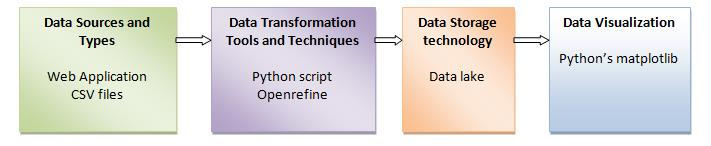

The pipeline phases are covered below:

## Data management plan

The data management plan consists of following phases:

### 1] Plan

I selected movielens dataset after going through the Readme file.  I have selected this dataset because movies topic interests me.

Technological Setup:

Tools used:

•	Spark

•	Hadoop

•	Onworks Virtual Machine

•	Python

•	Jupyter notebook

•	Open Refine

I have used the CentOS VM from https://www.onworks.net/ for the Project. Launched the CentOS Workstation shown below:

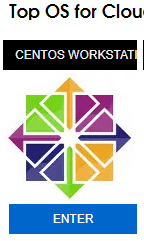

### 2] Acquire:  

#### 2a) Download

 Downloaded ml-latest-small.zip file from zip archive [1]. Copied the folder ml-latest-small and files hadoop_install.sh, spark_install.sh to the Virtual Machine. The instructions to setup Virtual Machine and to copy files to the Virtual Machine are provided at [7]. Logged in as root: 
 
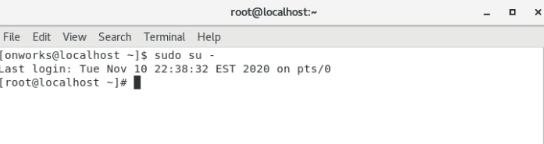
 
Installed hadoop as shown below using the command 

./hadoop_install.sh 

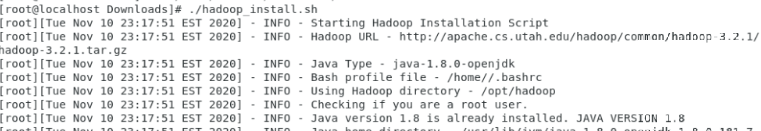

 
Installed Spark using the following command: 

./spark_install.sh 

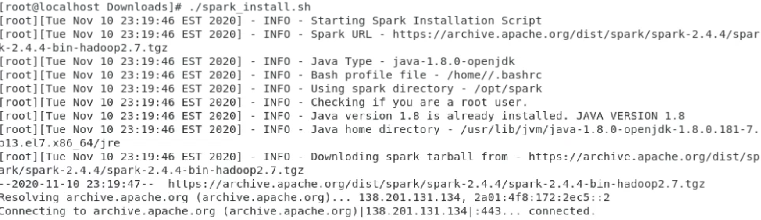

Jupyter notebook was installed and accessed using localhost.
The following libraries are required and were installed:

requests, bs4, tqdm, sklearn, afinn

Importe the required libraries

In [1]:
import os
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt

### 3] Processing

#### 3a) Storage

Created a data-lake for storing the files. The files movies.csv, links.csv, tags.csv and ratigs.csv were stored in csv format.


Used data lake for storing the files.

In [5]:
import findspark
findspark.init()

In [6]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession

In [7]:
movies_filepath = "hdfs://localhost:9000/data-lake/ml-latest-small/movies.csv"
print(movies_filepath)

hdfs://localhost:9000/data-lake/ml-latest-small/movies.csv


movies.csv file was read into df_movies dataframe using Spark as shown below:

In [8]:
spark= SparkSession.builder.getOrCreate()
df_movies = spark.read.csv(movies_filepath, header=True)

ratings.csv file was read into df_ratings dataframe using Spark as shown below:

In [9]:
ratings_filepath = "hdfs://localhost:9000/data-lake/ml-latest-small/ratings.csv"
print(ratings_filepath)

hdfs://localhost:9000/data-lake/ml-latest-small/ratings.csv


In [10]:
df_ratings = spark.read.csv(ratings_filepath, header=True)

In [11]:
links_filepath = "hdfs://localhost:9000/data-lake/ml-latest-small/links.csv"
print(links_filepath)

hdfs://localhost:9000/data-lake/ml-latest-small/links.csv


In [12]:
df_links = spark.read.csv(links_filepath, header=True)

tags.csv file was read into df_tags dataframe using Spark as shown below:

In [13]:
tags_filepath = "hdfs://localhost:9000/data-lake/ml-latest-small/tags.csv"
print(tags_filepath)

hdfs://localhost:9000/data-lake/ml-latest-small/tags.csv


In [14]:
df_tags = spark.read.csv(tags_filepath, header=True)

#### Summary of the data set

movies.csv consists of columns movieId of type string, title of type string, genres of type string.

In [15]:
df_movies.summary()

DataFrame[summary: string, movieId: string, title: string, genres: string]

In [16]:
df_movies.show(5)

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows



ratings consists of columns userId of type string, movieId of type string, rating of type string, timestamp of type string

In [17]:
df_ratings.describe()

DataFrame[summary: string, userId: string, movieId: string, rating: string, timestamp: string]

In [18]:
df_ratings.show(5)

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
+------+-------+------+---------+
only showing top 5 rows



links.csv consists of columns movieId of type string, imdbId of type string, tmdbId of type string

In [19]:
df_links.summary()

DataFrame[summary: string, movieId: string, imdbId: string, tmdbId: string]

In [20]:
df_links.show(5)

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|      1|0114709|   862|
|      2|0113497|  8844|
|      3|0113228| 15602|
|      4|0114885| 31357|
|      5|0113041| 11862|
+-------+-------+------+
only showing top 5 rows



tags consists of columns userId of type string, movieId of type string, tag of type string, timestamp of type string.

In [21]:
df_tags.summary()

DataFrame[summary: string, userId: string, movieId: string, tag: string, timestamp: string]

In [22]:
df_tags.show(5)

+------+-------+---------------+----------+
|userId|movieId|            tag| timestamp|
+------+-------+---------------+----------+
|     2|  60756|          funny|1445714994|
|     2|  60756|Highly quotable|1445714996|
|     2|  60756|   will ferrell|1445714992|
|     2|  89774|   Boxing story|1445715207|
|     2|  89774|            MMA|1445715200|
+------+-------+---------------+----------+
only showing top 5 rows



#### 3b) Visualize

Visualized overall rating by users. It shows 4 star rating has been given by maximum users. For that joined df_ratins and df_movies dataset on movieId column since both have this column.

In [23]:
df=df_movies.join(df_ratings, df_movies.movieId==df_ratings.movieId).drop(df_ratings.movieId)

In [24]:
df.show(2)

+-------+--------------------+--------------------+------+------+---------+
|movieId|               title|              genres|userId|rating|timestamp|
+-------+--------------------+--------------------+------+------+---------+
|      1|    Toy Story (1995)|Adventure|Animati...|     1|   4.0|964982703|
|      3|Grumpier Old Men ...|      Comedy|Romance|     1|   4.0|964981247|
+-------+--------------------+--------------------+------+------+---------+
only showing top 2 rows



###### Overall rating by users

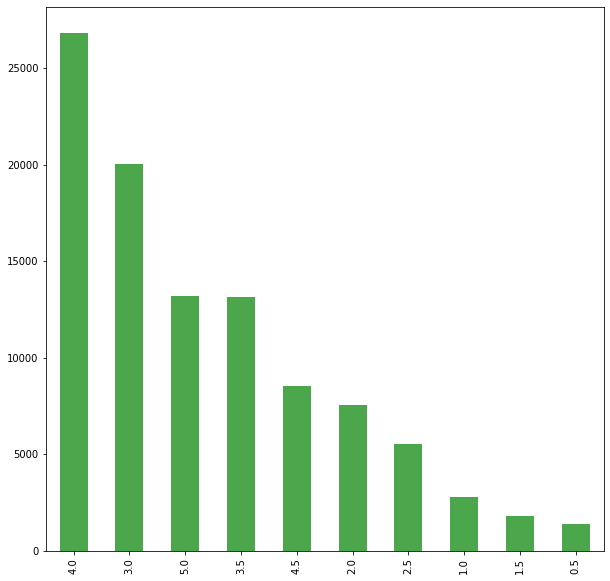

In [25]:
#overall rating by users
import matplotlib.pyplot as plt
import pandas
df=df.select("*").toPandas()
df['rating'].value_counts().plot(kind='bar',color='g',alpha=0.7,figsize=(10,10))
plt.show()

The top 10 tags used by users

In [26]:
df_tags_wordscount=df_tags.groupBy("tag").count().sort('count', ascending=False).alias('count').show(10)

+-----------------+-----+
|              tag|count|
+-----------------+-----+
| In Netflix queue|  131|
|      atmospheric|   36|
|thought-provoking|   24|
|        superhero|   24|
|          surreal|   23|
|           Disney|   23|
|            funny|   23|
|         religion|   22|
|           quirky|   21|
|      dark comedy|   21|
+-----------------+-----+
only showing top 10 rows



The bottom 10 tags used by users

In [27]:
df_tags_wordscount=df_tags.groupBy("tag").count().sort('count', ascending=True).alias('count').show(10)

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|          creativity|    1|
|              ransom|    1|
|           Wolverine|    1|
|          Emma Stone|    1|
|                hope|    1|
|intertwining stor...|    1|
|       John Travolta|    1|
|               macho|    1|
|               scifi|    1|
|        conversation|    1|
+--------------------+-----+
only showing top 10 rows



Interesting to know that many people are talking about In Netflix queue.

#### 3c) Quality and Cleaning

Quality of data is important since it helps to analyze the correct data and derive useful insights from it. It is essential to clean the data for that which consists of handling missing values, merging different datasets, form/ document metadata, identify outliers and remove them. 

Python and OpenRefine was used to identify the issues and clean the data.


Let's check df_movies and clean it.

In [28]:
from pyspark.sql.functions import isnan, when, count, col
df_movies.select([count(when(isnan(c), c)).alias(c) for c in df_movies.columns]).toPandas()

,movieId,title,genres
0,0,0,0


In [29]:
from pyspark.sql.functions import when, count, col
df_movies.select([count(when(col(c).isNull(), c)).alias(c) for c in 
           df_movies.columns]).toPandas().T

,0
movieId,0
title,0
genres,0


Let's tidy the data

In [30]:
# Separate year from title
df=df_movies.select("*").toPandas()
df['year'] = df.title.str.extract("\((\d{4})\)", expand=True)
df.year = pd.to_datetime(df.year, format='%Y')
df.year = df.year.dt.year 
df.title = df.title.str[:-7]

In [31]:
df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


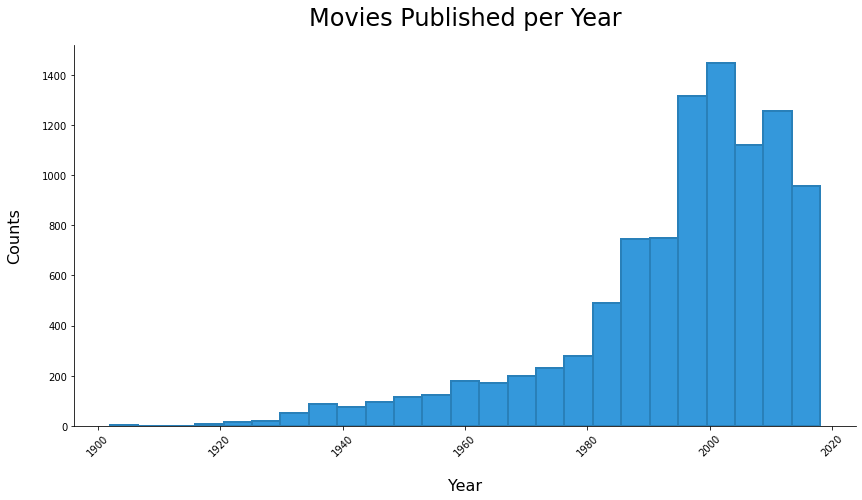

In [32]:
def show_movies(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    plt.xticks(rotation=45)
    
    
show_movies(df, 'year', title='Movies Published per Year', xlab='Year', ylab='Counts')

In [33]:
genre_df = pd.DataFrame(df['genres'].str.split('|').tolist(), index=df['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'Genre']

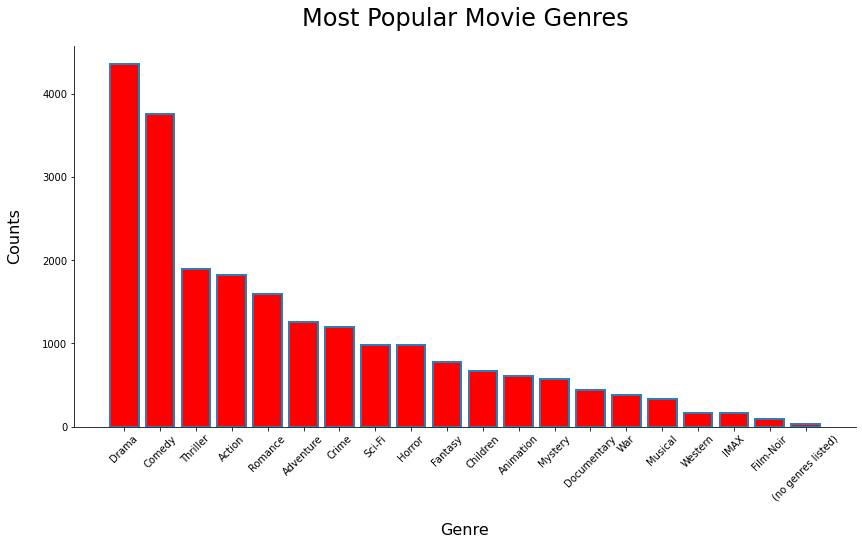

In [34]:
def make_bar_chart(dataset, attribute, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = dataset[attribute].value_counts().index
        ys = dataset[attribute].value_counts().values
    else:
        xs = dataset[attribute].value_counts().sort_index().index
        ys = dataset[attribute].value_counts().sort_index().values
        
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.bar(x=xs, height=ys, color='r', edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=45)
    
    
make_bar_chart(genre_df, 'Genre', title='Most Popular Movie Genres', xlab='Genre', ylab='Counts')

In [35]:
df.to_csv("/home/jvarghe/moviesupdated.csv")

Let's check for any outliers in Openrefine

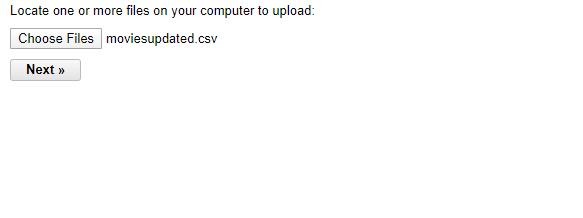

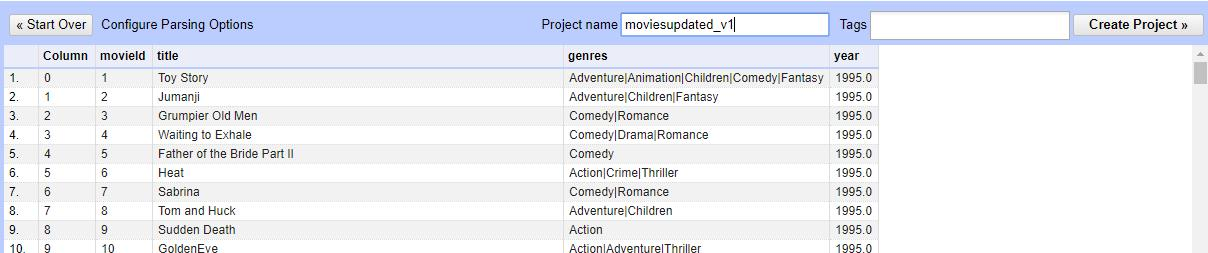

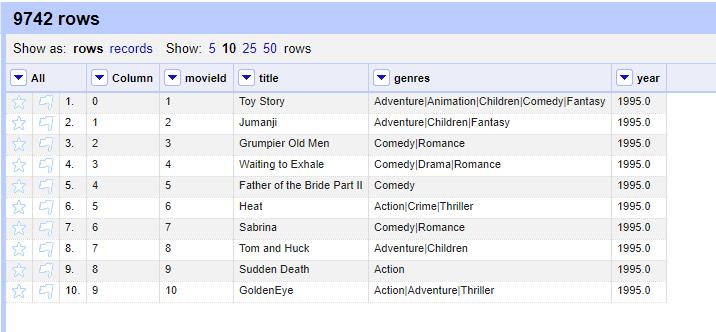

Created a text facet for movieId 

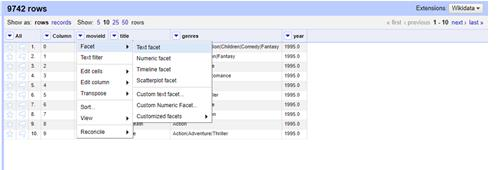

It shows unique 9742 entries so there are no duplicates and every row has a unique movieId

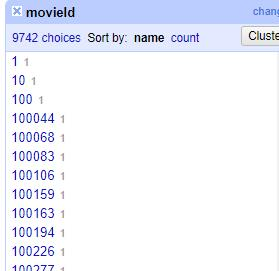

And because of that there were no clusters found.


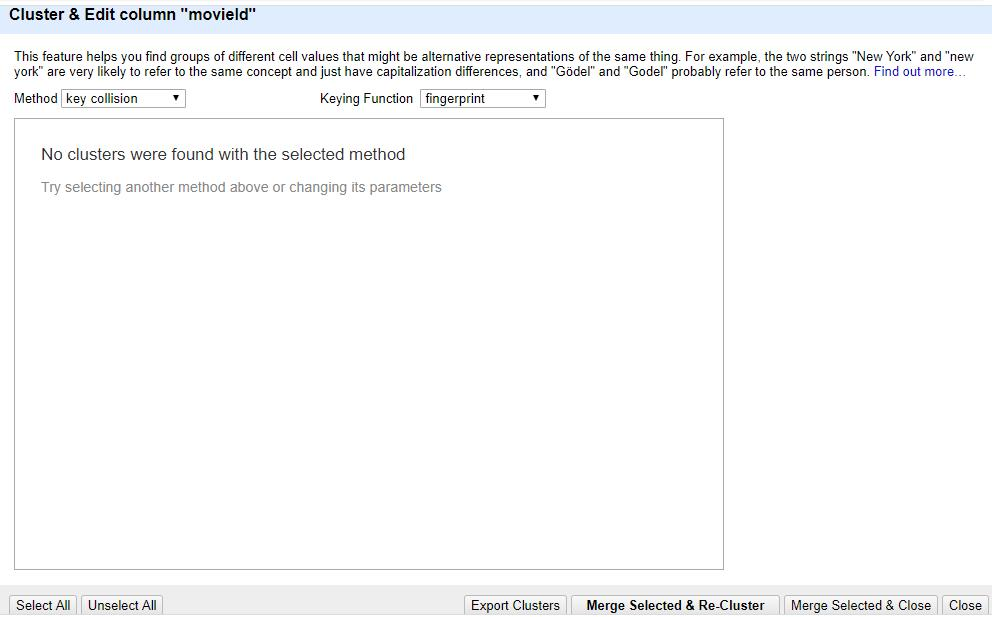

Next will examine the title field by creating a text facet on it:

There are movies which have similar names but they are not duplicate entries since released in different years and movie IDs are different.So, if we takethe example of hamlet we can see 5 different movies

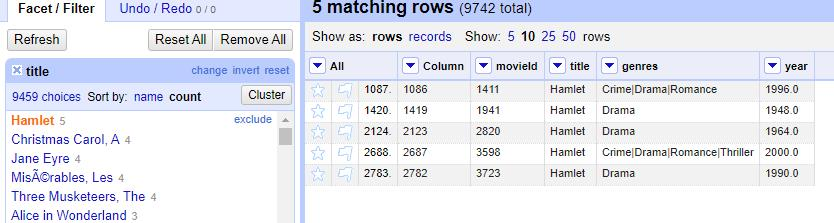

And Openrefine rightly suggested no clusters as shown below:

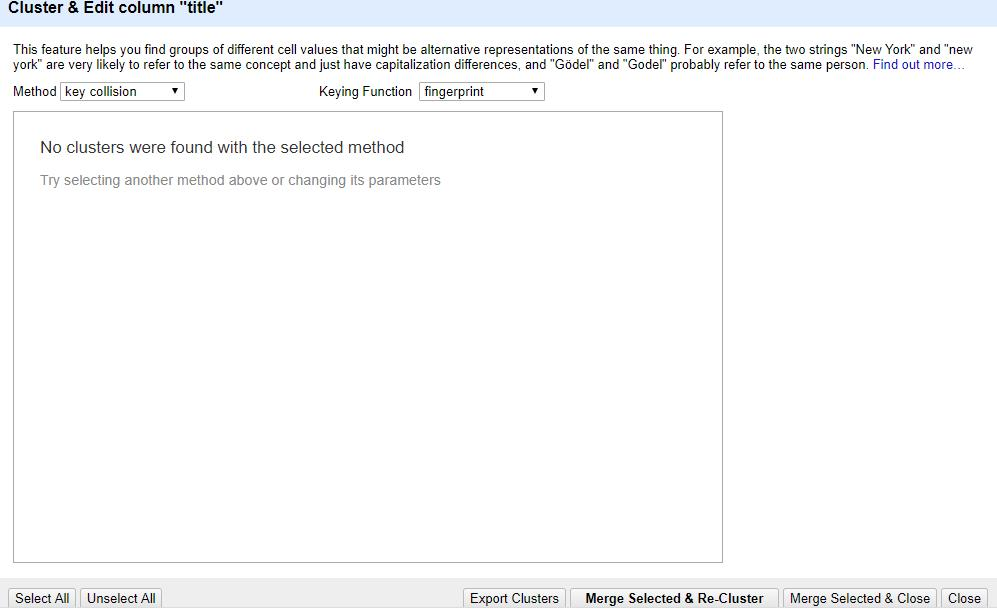

Created Text facet on the year

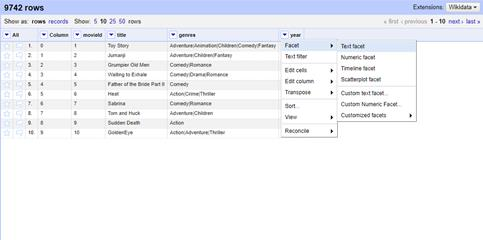

There were 13 blanks found:

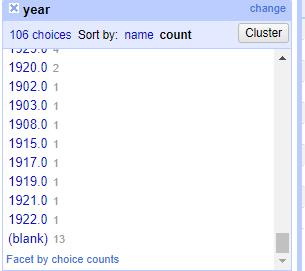

There were no clusters suggested

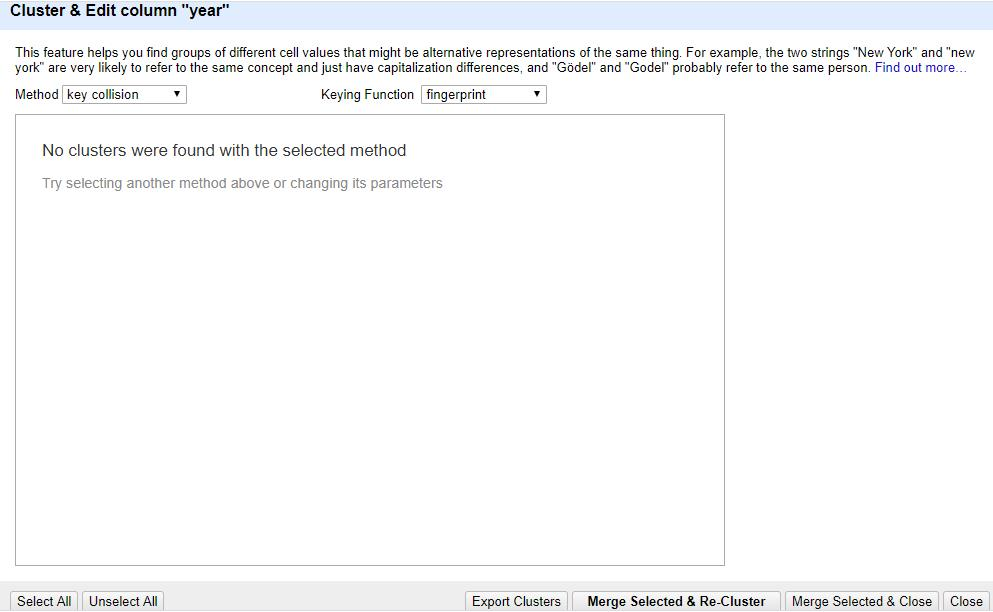

Didn’t delete the entries which have empty years since movieId ad titleare preset for it and can be used for further analysis. Apart from that there were no outliers.

Genre

Created Text facet for genre:

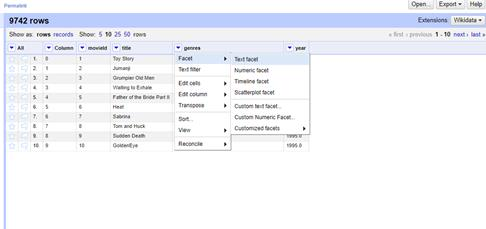

There were 34 enties which had no genres listed mentioned.

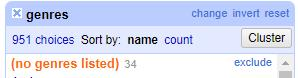


Didn’t change it to any value and left it as is,since it was not using movies and exported the file.

The exported file from openrefine was saved as moviesupdated_v1.csv on the local system which was then copied tothe VM and put in data-lake 
as follows

In [36]:
!  hadoop fs -put moviesupdated_v1.csv /data-lake

put: `/data-lake/moviesupdated_v1.csv': File exists


In [37]:
movies_filepath = "hdfs://localhost:9000/data-lake/moviesupdated_v1.csv"
print(movies_filepath)
df_movies = spark.read.csv(movies_filepath, header=True)

hdfs://localhost:9000/data-lake/moviesupdated_v1.csv


Let's check if there are any outliers

In [38]:
#! pip3 install seaborn --user

Let's check df_links and clean it.

In [39]:
df_links.select([count(when(isnan(c), c)).alias(c) for c in df_links.columns]).toPandas()

,movieId,imdbId,tmdbId
0,0,0,0


In [40]:
df_links.select([count(when(col(c).isNull(), c)).alias(c) for c in 
           df_links.columns]).toPandas()

,movieId,imdbId,tmdbId
0,0,0,8


In [41]:
# removing nulls
df_links = df_links.filter(df_links.tmdbId.isNotNull())
df_linksupdated=df_links.select("*").toPandas()

In [42]:
df_linksupdated.to_csv("/home/jvarghe/linksupdated.csv")

linksupdated.csv file was checked in Openrefine but there were no changes found so continuing with the use of df_linksupdated 
dataframe

Let's check df_ratings and clean it.

In [43]:
df_ratings.select([count(when(isnan(c), c)).alias(c) for c in df_ratings.columns]).toPandas()

,userId,movieId,rating,timestamp
0,0,0,0,0


In [44]:
df_ratings.select([count(when(col(c).isNull(), c)).alias(c) for c in 
           df_ratings.columns]).toPandas()

,userId,movieId,rating,timestamp
0,0,0,0,0


In [45]:
df_ratings=df_ratings.select("*").toPandas()
df_movies=df_movies.select("*").toPandas()
movie_data = pd.merge(df_ratings, df_movies, on='movieId')
movie_data['rating']=movie_data['rating'].astype(float)
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

Tried to find the distribution in ratigs using the diagrams below:

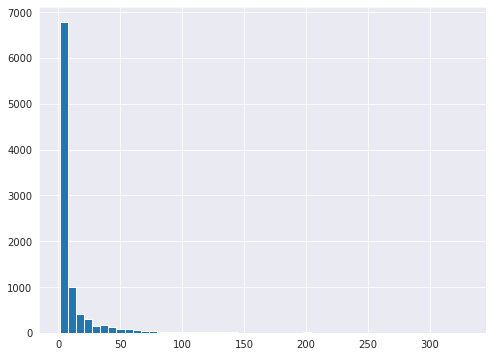

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

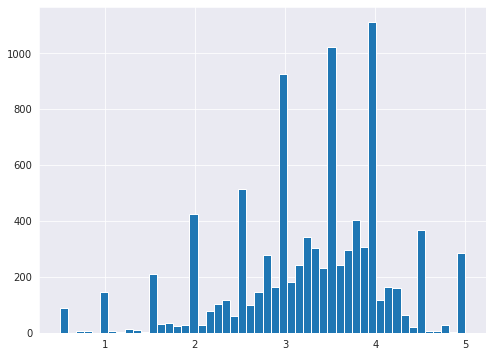

In [47]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

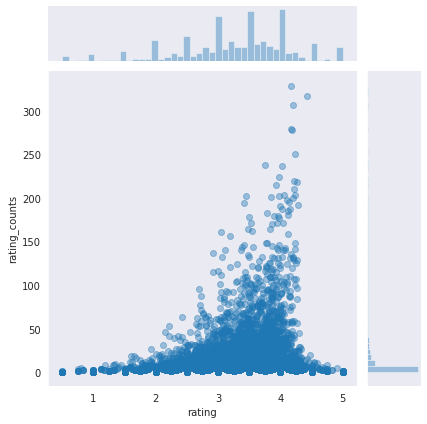

In [48]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

ratingsupdated.csv file was opened in Openrefine and only timestamp was changed and then it was exported and copied to the VM.
Then it was put in the data-lake and then read from there.The code has been commented since the file was very big ad was giving
memory error and not also because not using ratings below:

In [49]:
# df_ratingsupdated=df_ratings
# df_ratingsupdated.to_csv("/home/jvarghe/ratingsupdated.csv")

In [50]:
#!  hadoop fs -put ratingsupdated_v1.csv /data-lake

In [51]:
#ratings_filepath = "hdfs://localhost:9000/data-lake/ratingsupdated_v1.csv"
#print(ratings_filepath)
#df_ratings = spark.read.csv(ratings_filepath, header=True)

Let's check df_tags and clean it.

In [52]:
df_tags.select([count(when(isnan(c), c)).alias(c) for c in df_tags.columns]).toPandas()

,userId,movieId,tag,timestamp
0,0,0,0,0


In [53]:
df_tags.select([count(when(col(c).isNull(), c)).alias(c) for c in 
           df_tags.columns]).toPandas()

,userId,movieId,tag,timestamp
0,0,0,0,0


###### Tidying data

Openrefine is used for that


In [54]:
df_tagsupdated=df_tags.select("*").toPandas()
df_tagsupdated.to_csv("/home/jvarghe/tagsupdated.csv")

Following are the steps followed and the screenshot of it:

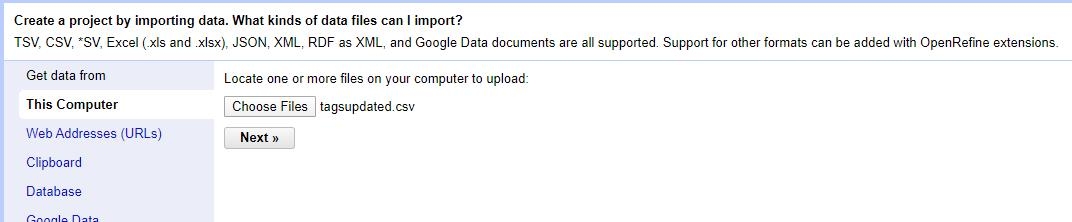

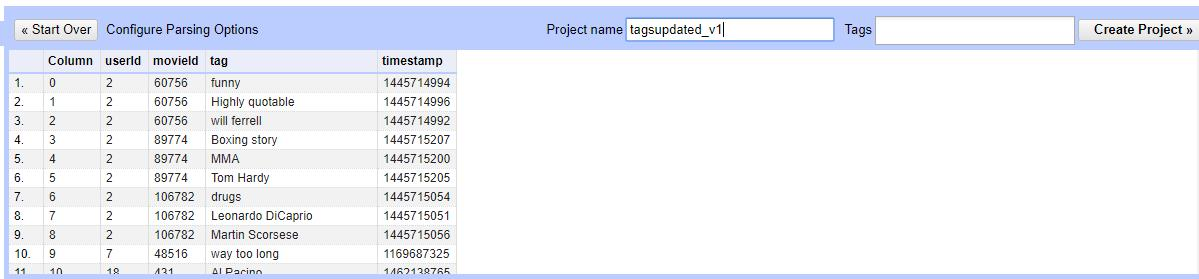

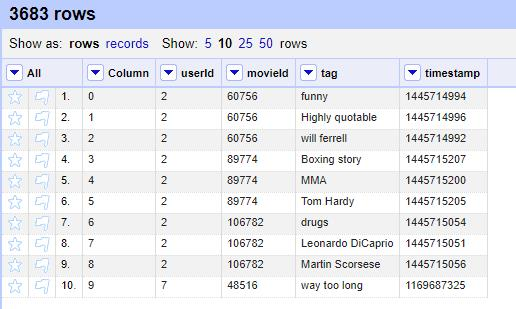

Converted timestamp to date

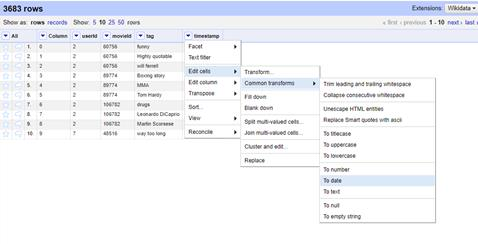

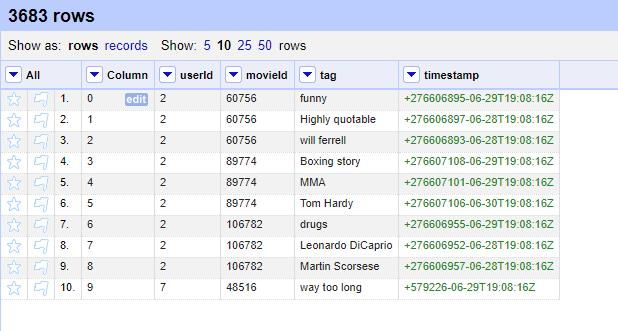

userId

Created a text facet for userID

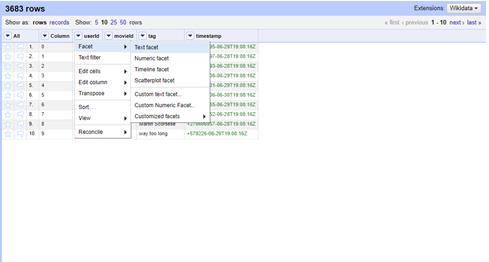

There were 58 choices 

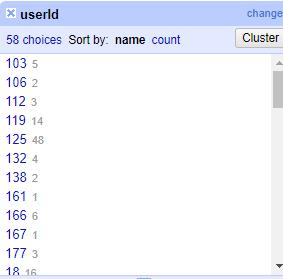

No clusters were found:

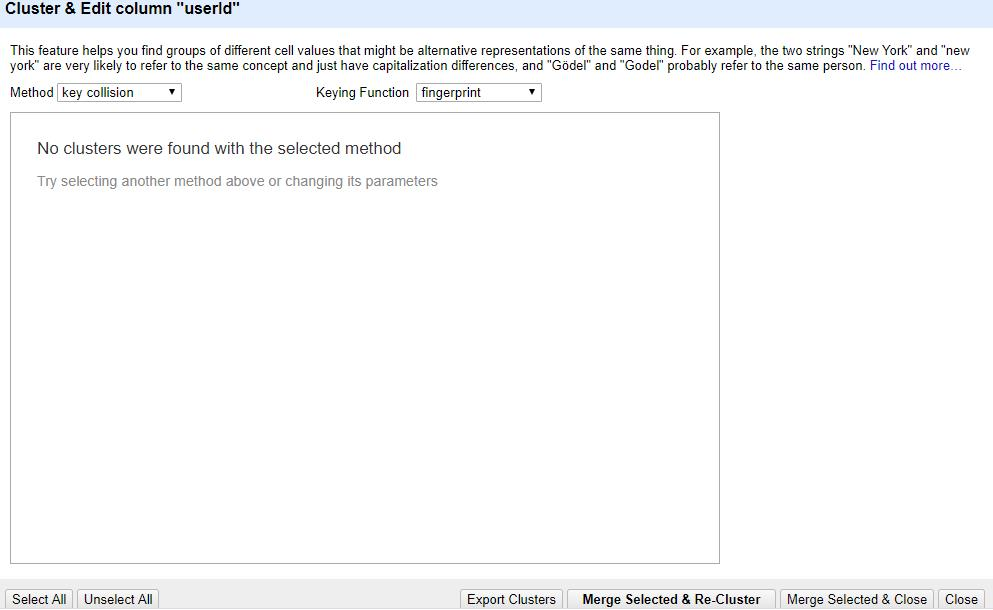

Created a text facet for movieId

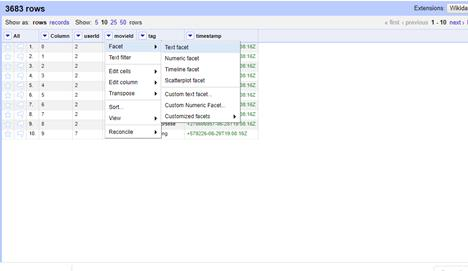

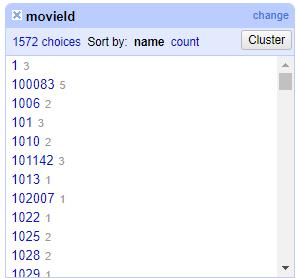

There were no clusters found :

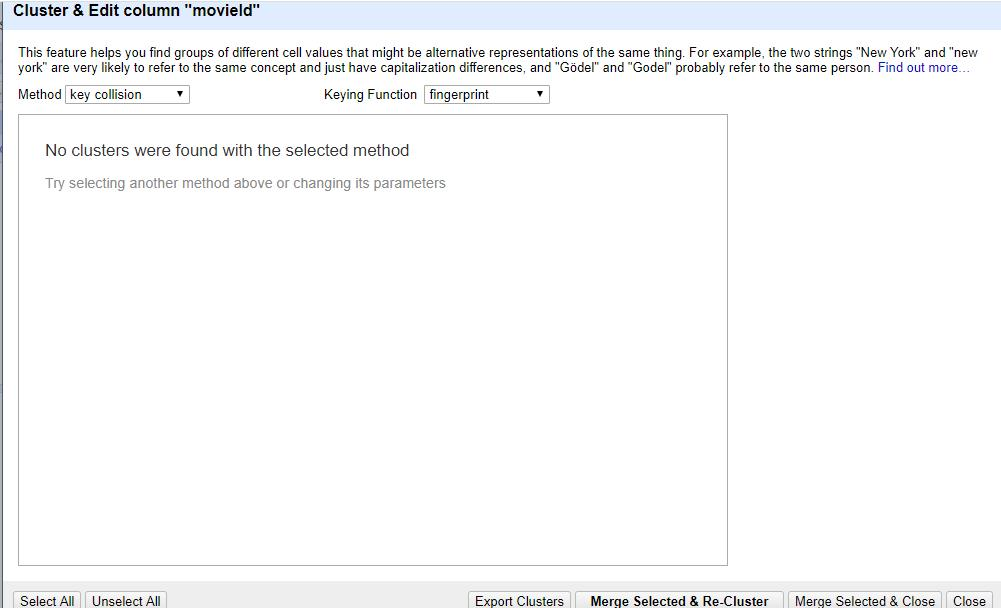

A text facet was created for tag:

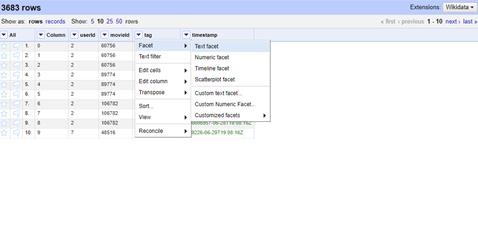

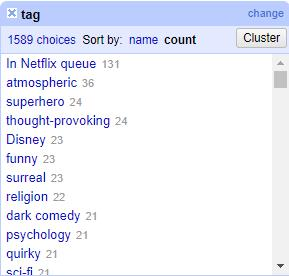

Clicked on Cluster
There were 114 clusters found:


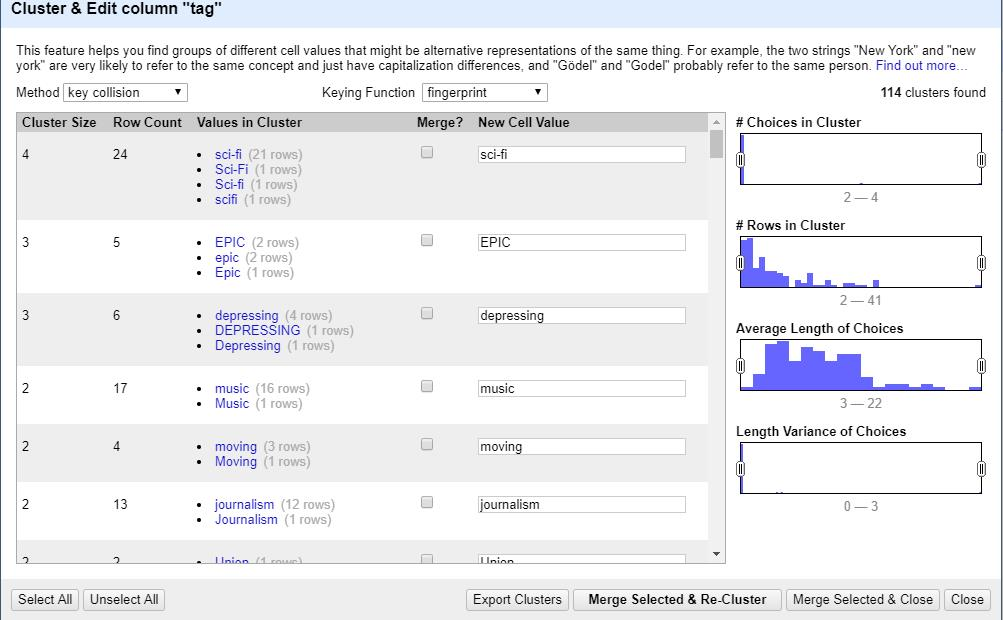

Clicked on Select All and Merged them all:

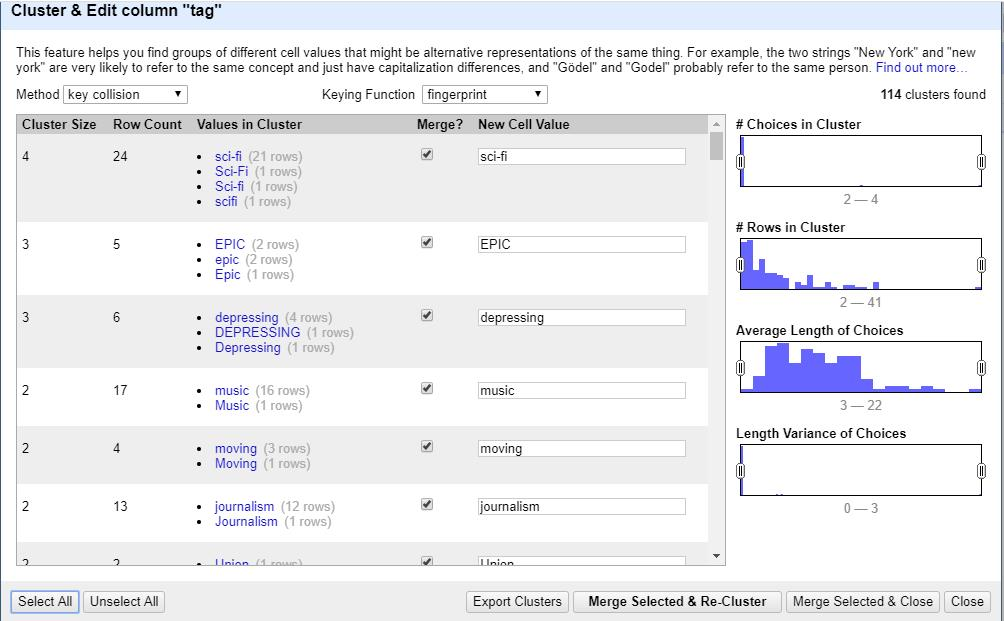

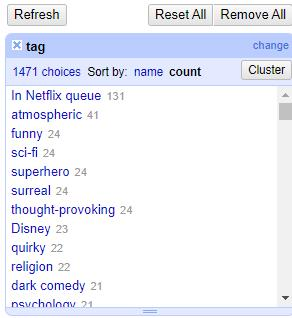

Timestamp

Create Text facet for it:


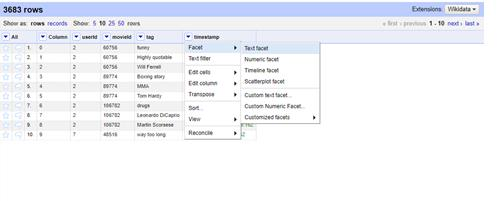

There were no anamolies found:

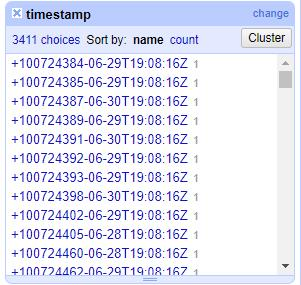

Clicked on Cluster:

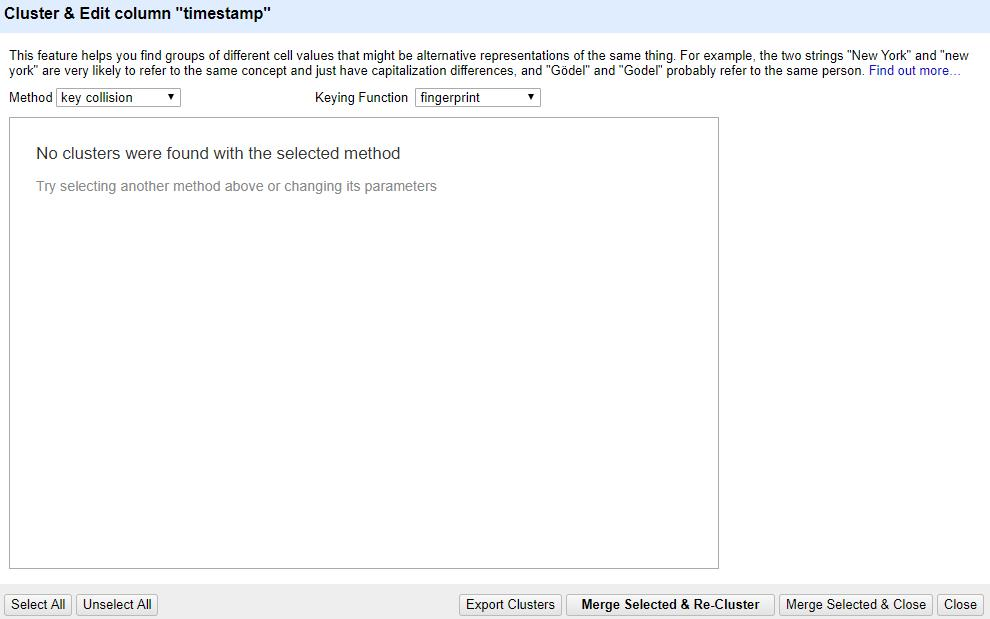

Clicked on Export

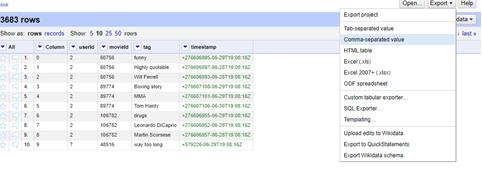  
    
    

The exported file was saved as tagsupdated_v1.csv on the local system which was then copied tothe VM and put in data-lake 
as follows

In [55]:
!  hadoop fs -put tagsupdated_v1.csv /data-lake

put: `/data-lake/tagsupdated_v1.csv': File exists


In [56]:
tags_filepath = "hdfs://localhost:9000/data-lake/tagsupdated_v1.csv"
print(tags_filepath)
df_tags = spark.read.csv(tags_filepath, header=True)

hdfs://localhost:9000/data-lake/tagsupdated_v1.csv


user_reviews.csv file was created by cleaning it in Openrefine

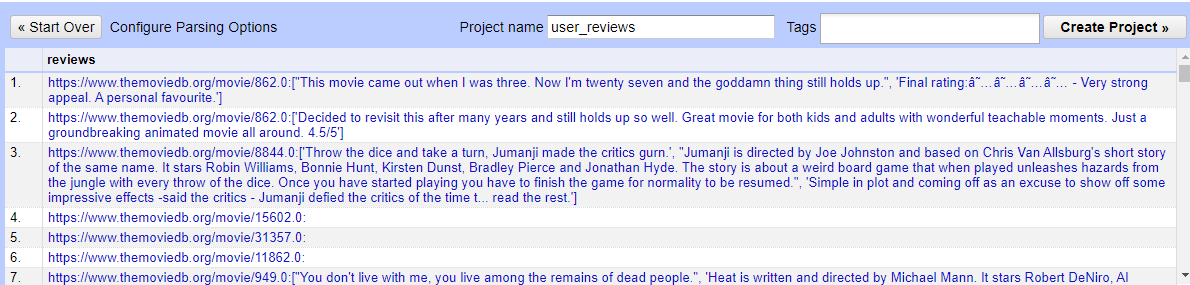

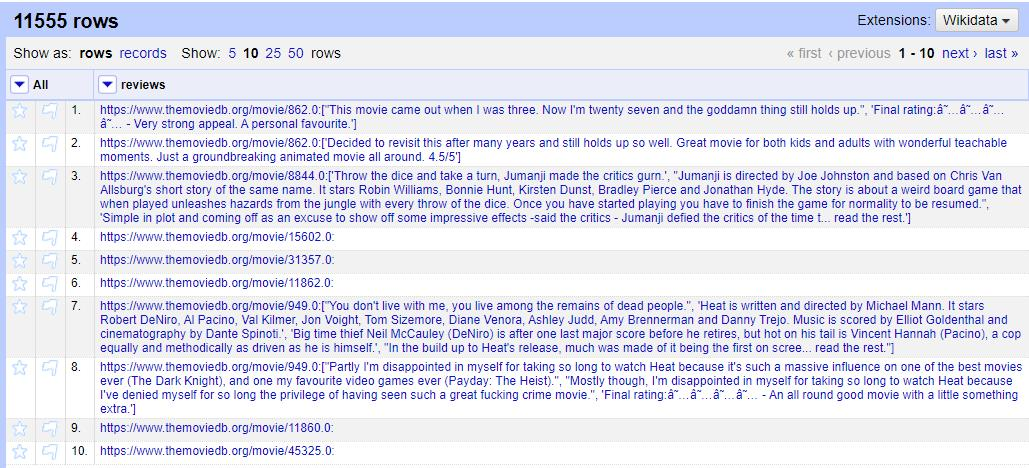

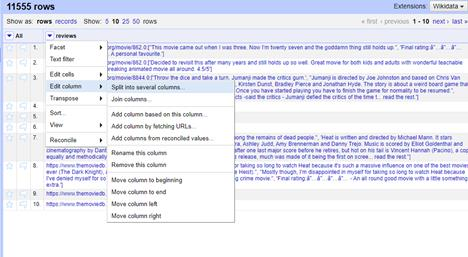

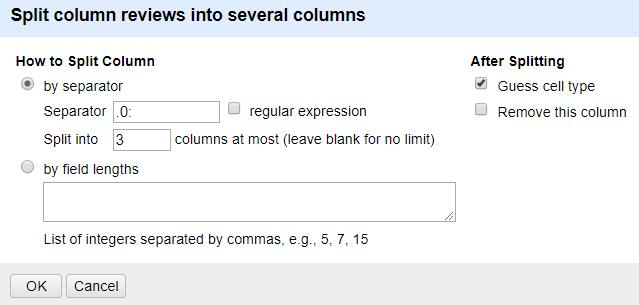

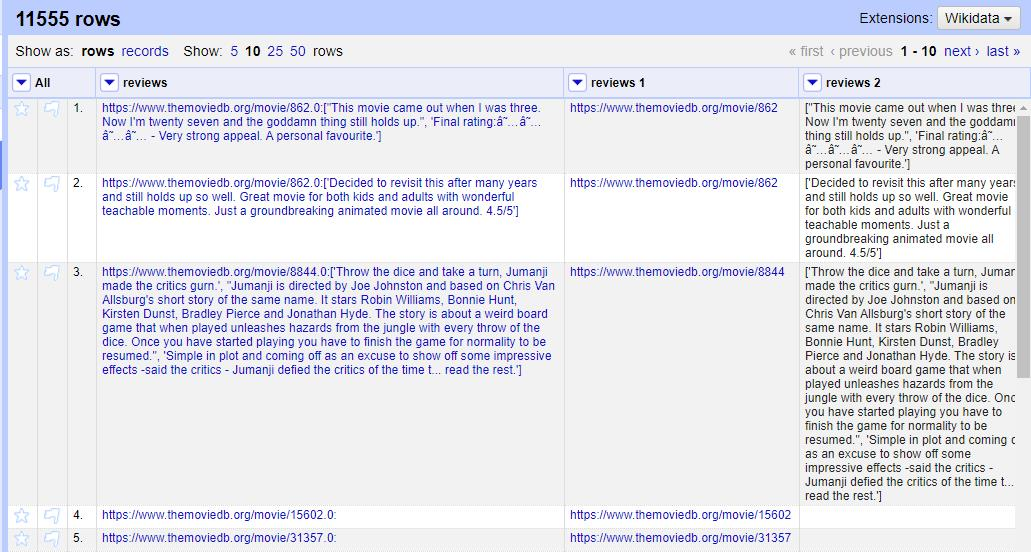

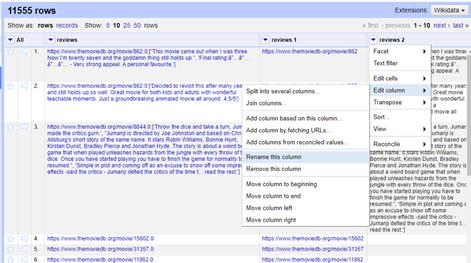

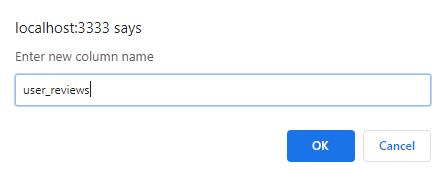

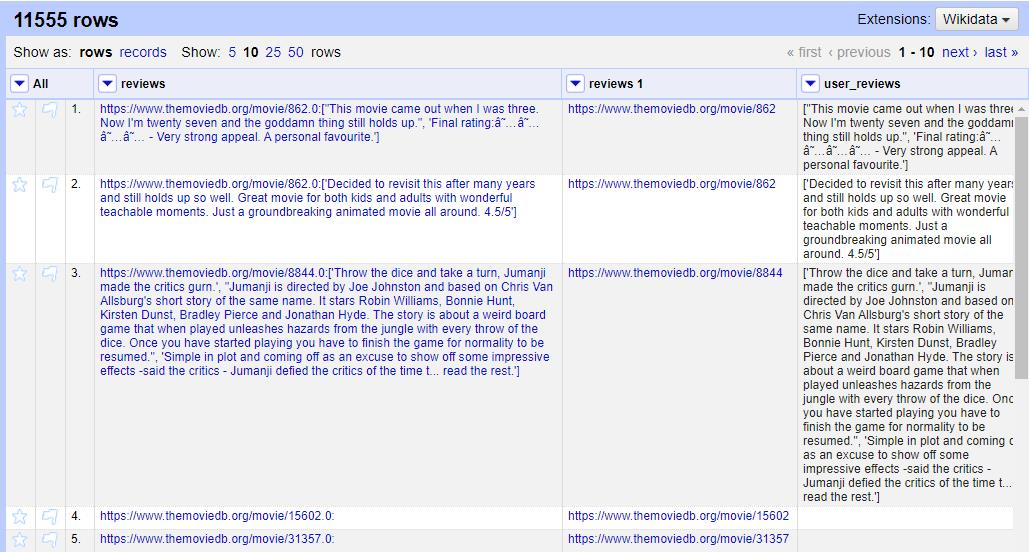


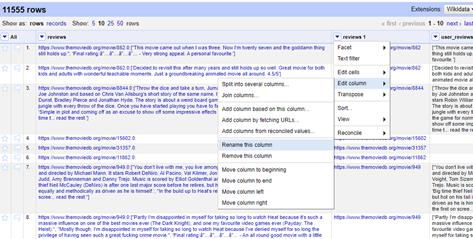

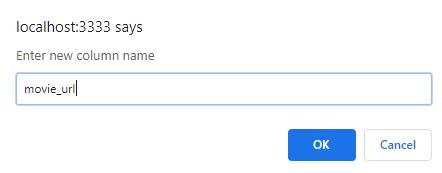

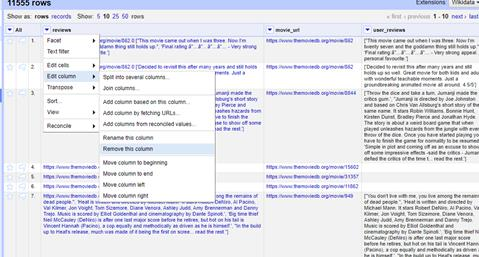

Finally have 2 columns as shown below:

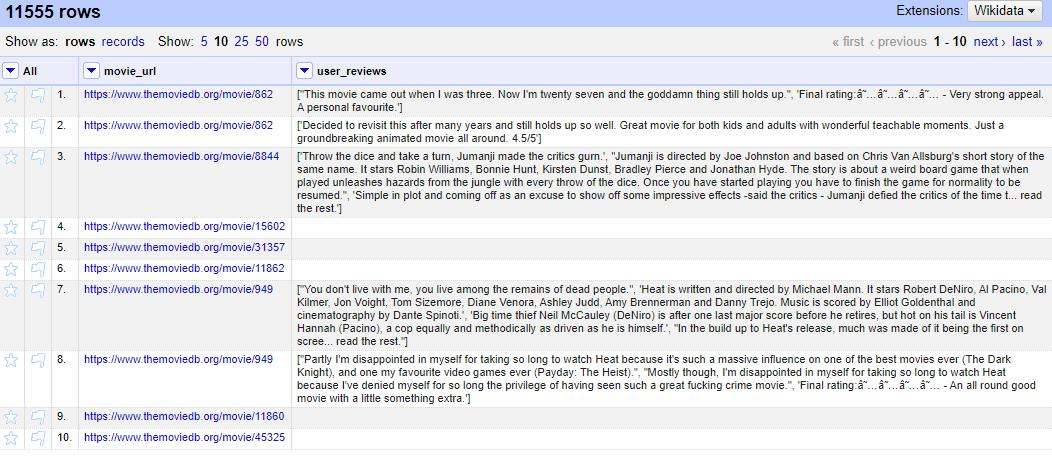

Then will export the file and save the file in data lake


### 4] Analyze: 

Jupyter notebook, python script, and visualizations were used for analysis

#### Preditive analysis

##### 4a) Recommender

The goal was to predict the movies user would like based on the star cast of the movie they had watched before. Content based filtering is used for it. It is also known as cognitive filtering. Web Scraping was used to get star cast from the website. TfidfVectorizer was used which was initialized with min_df=0 and stopwords="english", to remove English stop words.
It is used to turn the raw text into a "bag-of-words" representation. max_df and min_df  arguments could be provided when instantiating the vectorizer. These arguments can either take a float between 0.0 and 1.0 or an integer. The df stands for "document frequency." These arguments tell the vectorizer to remove words that occur over (max_df) and under (min_df) a certain amount of documents. This will remove frequent words - which show up all the time and therefore are not informative - and infrequent words, which are so rare as to just be noise. If you pass these arguments a float, that float represents the proportion of documents (e.g. max_df=0.8 means, remove all words that show up in more than 80% of the ) and if you pass these arguments an integer, that integer represents the number of documents (e.g. min_df=4, remove all words that show up in less than 4 document).



##### Predict the movies user would like based on the Star cast of the movie

Used web scraping to get the star cast of the movies using the value of tmdbId from links.csv 
The format of the movie url is https://www.themoviedb.org/movie/<tmdbId>

In [57]:
df_linksupd=df_links.select("*").toPandas()
df_linksupd['movie_url'] = df_linksupd.apply(lambda row: 'https://www.themoviedb.org/movie/' + str(int(row.tmdbId)), axis=1)
dlList = df_linksupd['movie_url'].tolist()

NOTE: Have comented out the code sections like web scraping which takes too much time and install commands since the libraries
are already installed. Please uncomment and use it while running the notebook for the first time.

In [58]:
#!  pip3 install requests --user

In [59]:
#!  pip3 install bs4 --user

In [60]:
#!  pip3 install tqdm --user

In [61]:
# Web scraping code to get star cast
# import requests  
# import re
# from bs4 import BeautifulSoup  
# from tqdm import tqdm

# imdbURLS = dlList[:]

# cast_records = [] 
# for x in tqdm(imdbURLS): 
#     # title
#     title = re.search('/movie/(.*)', x)
#     tmdbID = title.group(1)
#     # web scraping
#     r = requests.get(x)
#     soup = BeautifulSoup(r.text, 'html.parser')  
#     results1 = soup.find_all('div', attrs={'id':'cast_scroller'}) 
#     if results1 is not None and len(results1) > 0:
#         first_result = results1[0]
#         val=first_result.select('a')
#         res = [i.text.strip() for i in val]
#         while("" in res) : 
#             res.remove("")
#         if("View More" in res) : 
#             res.remove("View More")
#         cast_records.append(res)
#     else:
#         cast_records.append('')

In [62]:
# df_linksupd['Star_Cast'] = cast_records
# print(df_linksupd.head())
# df_linksupd.to_csv("links_starcast.csv",index=False)

### Content Based Recommendation based on Star Cast

In [63]:
!  hadoop fs -put links_starcast.csv /data-lake

put: `/data-lake/links_starcast.csv': File exists


In [64]:
starcast_filepath = "hdfs://localhost:9000/data-lake/links_starcast.csv"
print(starcast_filepath)
df_starcast = spark.read.csv(starcast_filepath, header=True)
df_starcast=df_starcast.select("*").toPandas()

hdfs://localhost:9000/data-lake/links_starcast.csv


In [65]:
df_movielink = pd.merge(df_movies, df_starcast, on = 'movieId')
df_movielink.head()

,Column,movieId,title,genres,year,imdbId,tmdbId,movie_url,Star_Cast
0,0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,114709,862,https://www.themoviedb.org/movie/862,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
1,1,2,Jumanji,Adventure|Children|Fantasy,1995.0,113497,8844,https://www.themoviedb.org/movie/8844,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D..."
2,2,3,Grumpier Old Men,Comedy|Romance,1995.0,113228,15602,https://www.themoviedb.org/movie/15602,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret..."
3,3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0,114885,31357,https://www.themoviedb.org/movie/31357,"['Whitney Houston', 'Angela Bassett', 'Loretta..."
4,4,5,Father of the Bride Part II,Comedy,1995.0,113041,11862,https://www.themoviedb.org/movie/11862,"['Steve Martin', 'Diane Keaton', 'Martin Short..."


In [66]:
df_movielink['Star_Cast'] = df_movielink['Star_Cast'].fillna("").astype('str')

In [67]:
#! sudo pip3 install sklearn

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_movielink['Star_Cast'])
tfidf_matrix.shape

(9734, 111735)

In [69]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [70]:
# Build a 1-dimensional array with movie titles
titles = df_movielink['title']
indices = pd.Series(df_movielink.index, index=df_movielink['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def cast_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# IV] Results 

### Evaluation of recommender system:

'Good Will Hunting has a star cast of Matt Damon, Robin Williams, Ben Afflick, Stellan Skarsgård, Stellan Skarsgård, Minnie Driver, Casey Affleck,Cole Hauser, and John Mighton.Recommendation system provided the movies Gerry which has star cast
Casey Affleck and Matt Damon, Robin Williams: Live on Broadway which has star cast Robin Williams. So, recommendation system based on star cast works as expected.

In [71]:
cast_recommendations('Good Will Hunting').head(20)

4228                               Gerry
9508    Robin Williams: Live on Broadway
1243                            Phantoms
1883                      200 Cigarettes
3610                      Ocean's Eleven
2623                        Return to Me
2299                               Dogma
5358                 Surviving Christmas
5311             Exorcist: The Beginning
5525                       Club Paradise
9207                    The Finest Hours
9407               Manchester by the Sea
7726                         Tower Heist
7411                      I'm Still Here
41                            To Die For
6586                      Gone Baby Gone
3466      Jay and Silent Bob Strike Back
7580                         Melancholia
5317                           Paparazzi
4975                         School Ties
Name: title, dtype: object

#### 4b) Predict movie success using reviews

AFFIN was used to apply affinity score on reviews. Reviews were collected from the website by web scraping. AFINN is an open-source Python library that performs sentiment analysis on textual data and assigns a sentiment score. A positive AFINN score indicates positive sentiment and a negative AFINN score indicates negative sentiment. Mean and median of AFFIN score was 0 centric. For the labels, decided to assign AFFIN scores less than zero as 0=Negatives and AFFIN scores greater than or equal to zero as 1=Positives.

With the reviews labeled as either Negative(0) or Positive (1), performed the machine learning step. Because computers are good with processing numbers, but not as good with processing textual data, used TD-IDF to vectorize tags to facilitate machine learning. Then split the data in into 75% training data and 25% test data. I chose multiple classification algorithms to process reviews. The algorithms selected are Random Forest Classifier, Decision Tree Classifier, Logistic Regression, Naive Bayes, and Support Vector Classifier (SVC) which is a Support Vector Machine (SVM) method capable of performing binary and multi-class classification.

Commented the web scraping code below

In [72]:
# import requests  
# import re
# from bs4 import BeautifulSoup  
# from tqdm import tqdm

# imdbURLS = dlList[:]

# newrecords = [] 
# for x in tqdm(imdbURLS):     
#     title = re.search('/movie/(.*)/reviews', x)
#     flag= False
    
#     r = requests.get(x+'/reviews')
#     soup = BeautifulSoup(r.text, 'html.parser')  
#     results = soup.find_all('div', attrs={'class':'teaser'})     
#     l=len(results)
#     print("length is:",l)
#     i=0
#     while results is not None and l > 0:
#         flag = True
#         first_result = results[i].find_all('p')               
#         res = [i.text for i in first_result]
#         print("res is ",res)
#         newrecords.append(x+':'+str(res))
#         l=l-1
#         i=i+1
#     if(flag == False):
#         newrecords.append(x+':')    

In [73]:
# df_reviews=pd.DataFrame(newrecords,columns=['reviews'])
# df_reviews.to_csv("/user_reviews.csv",index=False)

In [74]:
#!  hadoop fs -put user_reviews.csv /data-lake

In [75]:
reviews_filepath = "hdfs://localhost:9000/data-lake/user_reviews.csv"
print(reviews_filepath)

hdfs://localhost:9000/data-lake/user_reviews.csv


In [76]:
spark= SparkSession.builder.getOrCreate()
df_reviews = spark.read.csv(reviews_filepath, header=True)

In [77]:
df_links= pd.read_csv('/home/jvarghe/links.csv', encoding="latin1")

In [78]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [79]:
df_reviews=df_reviews.select("*").toPandas()

In [80]:
df_reviews.head()

,movie_url,user_reviews
0,https://www.themoviedb.org/movie/862,"""[""""This movie came out when I was three. Now ..."
1,https://www.themoviedb.org/movie/862,['Decided to revisit this after many years and...
2,https://www.themoviedb.org/movie/8844,"""['Throw the dice and take a turn, Jumanji mad..."
3,https://www.themoviedb.org/movie/15602,None
4,https://www.themoviedb.org/movie/31357,None


In [81]:
df_withreviews= pd.merge(df_linksupd, df_reviews, on = 'movie_url')

In [82]:
df_withreviews.head()

,movieId,imdbId,tmdbId,movie_url,user_reviews
0,1,0114709,862,https://www.themoviedb.org/movie/862,"""[""""This movie came out when I was three. Now ..."
1,1,0114709,862,https://www.themoviedb.org/movie/862,['Decided to revisit this after many years and...
2,2,0113497,8844,https://www.themoviedb.org/movie/8844,"""['Throw the dice and take a turn, Jumanji mad..."
3,3,0113228,15602,https://www.themoviedb.org/movie/15602,None
4,4,0114885,31357,https://www.themoviedb.org/movie/31357,None


In [83]:
type(df_withreviews['user_reviews'])

pandas.core.series.Series

In [84]:
df_withreviews.head()

,movieId,imdbId,tmdbId,movie_url,user_reviews
0,1,0114709,862,https://www.themoviedb.org/movie/862,"""[""""This movie came out when I was three. Now ..."
1,1,0114709,862,https://www.themoviedb.org/movie/862,['Decided to revisit this after many years and...
2,2,0113497,8844,https://www.themoviedb.org/movie/8844,"""['Throw the dice and take a turn, Jumanji mad..."
3,3,0113228,15602,https://www.themoviedb.org/movie/15602,None
4,4,0114885,31357,https://www.themoviedb.org/movie/31357,None


In [85]:
df_withreviews['user_reviews'] = df_withreviews['user_reviews'].apply(lambda row: str(row))

In [86]:
#! pip3 install afinn --user

In [87]:
from afinn import Afinn
def affinity_score(df): 
    afinn = Afinn()
    df['review_score'] = df['user_reviews'].apply(afinn.score)
    
affinity_score(df_withreviews)

In [88]:
df_withreviews['review_score'].value_counts(dropna=False)

 0.0     7844
 2.0      385
 3.0      382
 1.0      299
 4.0      270
-2.0      267
-1.0      248
 6.0      212
 5.0      212
-3.0      200
-4.0      140
 7.0      125
 8.0      121
-5.0       94
 9.0       92
 10.0      69
-6.0       64
-7.0       56
 11.0      49
 12.0      47
-9.0       39
-8.0       35
 13.0      34
 14.0      32
 15.0      26
 16.0      25
-10.0      23
-11.0      20
 17.0      18
-12.0      17
 18.0      12
-13.0      11
 21.0      11
-14.0       9
 22.0       8
-15.0       7
 20.0       6
 24.0       5
-17.0       5
 26.0       5
 19.0       5
 23.0       5
-20.0       4
-16.0       4
-21.0       3
 25.0       3
-18.0       3
-25.0       2
 33.0       1
 83.0       1
-26.0       1
 37.0       1
Name: review_score, dtype: int64

In [89]:
np.mean(df_withreviews['review_score'])

0.7129012719563901

In [90]:
np.median(df_withreviews['review_score'])

0.0

(array([3.000e+00, 0.000e+00, 7.000e+00, 3.000e+00, 9.000e+00, 2.700e+01,
        3.700e+01, 6.200e+01, 9.100e+01, 1.580e+02, 3.400e+02, 8.359e+03,
        6.840e+02, 6.520e+02, 4.240e+02, 2.460e+02, 2.100e+02, 8.100e+01,
        5.800e+01, 4.300e+01, 1.700e+01, 1.700e+01, 1.800e+01, 8.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-26.  , -23.82, -21.64, -19.46, -17.28, -15.1 , -12.92, -10.74,
         -8.56,  -6.38,  -4.2 ,  -2.02,   0.16,   2.34,   4.52,   6.7 ,
          8.88,  11.06,  13.24,  15.42,  17.6 ,  19.78,  21.96,  24.14,
         26.32,  28.5 ,  30.68,  32.86,  35.04,  37.22,  39.4 ,  41.58,
         43.76,  45.94,  48.12,  50.3 ,  52.48,  54.66,  56.84,  59.02,
         61.2 , 

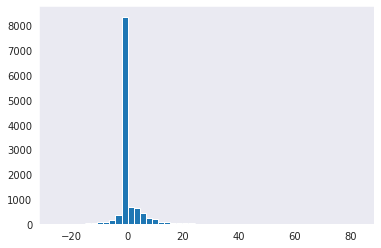

In [91]:
#Histogram plot
import matplotlib.pyplot as plt
plt.hist(df_withreviews['review_score'].values, bins=50)

In [92]:
#Mean and median are almost same at around 0,so encoding.Any score greater than 0 is 1(promotor) and anything less than 1 is 0(detractor)
df_withreviews['review_score'] = df_withreviews['review_score'].apply(lambda x: 0 if x < 0 else 1)

In [93]:
#Data after encoding
df_withreviews['review_score'].value_counts(dropna=False)

1    10305
0     1252
Name: review_score, dtype: int64

In [94]:
df_withreviews.head(10)

,movieId,imdbId,tmdbId,movie_url,user_reviews,review_score
0,1,0114709,862,https://www.themoviedb.org/movie/862,"""[""""This movie came out when I was three. Now ...",0
1,1,0114709,862,https://www.themoviedb.org/movie/862,['Decided to revisit this after many years and...,1
2,2,0113497,8844,https://www.themoviedb.org/movie/8844,"""['Throw the dice and take a turn, Jumanji mad...",0
3,3,0113228,15602,https://www.themoviedb.org/movie/15602,None,1
4,4,0114885,31357,https://www.themoviedb.org/movie/31357,None,1
5,5,0113041,11862,https://www.themoviedb.org/movie/11862,None,1
6,6,0113277,949,https://www.themoviedb.org/movie/949,"""[""""You don't live with me",1
7,6,0113277,949,https://www.themoviedb.org/movie/949,"""[""""Partly I'm disappointed in myself for taki...",1
8,7,0114319,11860,https://www.themoviedb.org/movie/11860,None,1
9,8,0112302,45325,https://www.themoviedb.org/movie/45325,None,1


### 5] Preservation:  
    
The project would be stored in github as well as google drive which would ensure that it is preserved well. Its presence at 
different locations will also ensure its longevity.

### 6] Publish and Share:
Documentation is created for sharing, and giving access to github to team would ensure its security. Visualization would be 
made available to sponsors.    

# IV] Results 

### 1] Evaluation of recommender system:

'Good Will Hunting has a star cast of Matt Damon, Robin Williams, Ben Afflick, Stellan Skarsgård, Stellan Skarsgård, Minnie Driver, Casey Affleck,Cole Hauser, and John Mighton.Recommendation system provided the movies Gerry which has star cast
Casey Affleck and Matt Damon, Robin Williams: Live on Broadway which has star cast Robin Williams. So, recommendation system based on star cast works as expected.

## Machine Learning-Model Selection

In [95]:
#In this section we perform below activities:
#1-Use BagOfWords model-TfidVectorizer to generate sparse matrix
#2-Perform split of test and train data(25% -Test & 75%-Train)
#3-Comparision of different Alorithms using CrossFold validation

### Bag-of-Word Model-TfidfVectorizer

In [96]:
#df_tags=df_tags.select("*").toPandas()
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_df=5)
X = tv.fit_transform(df_withreviews['user_reviews'])
X.shape

(11557, 16437)

In [97]:
y = df_withreviews['review_score']
y.shape

(11557,)

In [98]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: review_score, dtype: int64

In [99]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

## 2] Evaluation of model to predict movie success

###  Compare Algorithms using cross fold validation

Comparison of different Algorithms was performed using 3-fold cross validation. As seen
in the Figure below, the Logistic Regression and Naïve Bayes have a mean accuracy of 89.09%.
Figure below shows a boxplot of the accuracy performance of each algorithm to demonstrate the distributions of accuracy scores.

In [100]:
#Splitting train and test dataset in ratio of 75% to 25% resepectively.
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3057)

In [101]:
X_train.shape

(8667, 16437)

/home/jvarghe/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


svc: 0.890389 
nb: 0.890850 


/home/jvarghe/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/jvarghe/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


logreg: 0.890850 


/home/jvarghe/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


rclf: 0.890043 


/home/jvarghe/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


clf: 0.884620 

Optimal model config is  nb
Optimal config is        MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


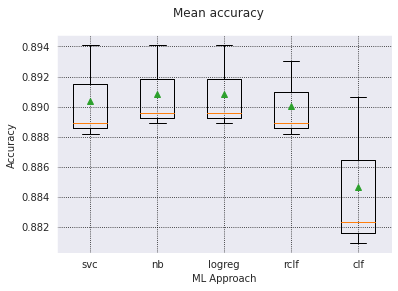

In [102]:
# Compare Algorithms using cross fold validation
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

 

models = []
models.append(('svc',  SVC()))
models.append(('nb',  MultinomialNB()))
models.append(('logreg',  LogisticRegression()))
models.append(('rclf',  RandomForestClassifier()))
models.append(('clf', DecisionTreeClassifier(random_state=0)))
# evaluate each model in turn
results = []
names = []
meanAccuracies = []


for name, model in models:
    kfold = KFold(n_splits=3, random_state=7)
    estimators = []
    estimators.append((name, model))
    model = Pipeline(estimators)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
    meanAccuracies.append(cv_results.mean())
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)
print('\nOptimal model config is ', models[np.argmax(meanAccuracies)][0])
print('Optimal config is       ', models[np.argmax(meanAccuracies)][1])

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean accuracy')
ax = fig.add_subplot(111)
pyplot.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
#pyplot.grid()
pyplot.xlabel("ML Approach")
pyplot.ylabel("Accuracy")
ax.grid(b=True, which='major', color='black', linestyle=':')
pyplot.show()


In [103]:
results = pd.DataFrame(columns=["ExpID", "Accuracy", "Experiment description"])
results.loc[0] = ["SVC", "0.890389 ", "No Tuning"]
results.loc[len(results)+1] = ["Naive Bayes", "0.890850", "No Tuning"]
results.loc[len(results)+1] = ["Logistic Regression", "0.890850", "No Tuning"]
results.loc[len(results)+1] = ["RandonForest Classifier", "0.890158", "No Tuning"]
results.loc[len(results)+1] = ["DecisionTreeClassifier", " 0.884620", "No Tuning"]
results

,ExpID,Accuracy,Experiment description
0,SVC,0.890389,No Tuning
2,Naive Bayes,0.890850,No Tuning
3,Logistic Regression,0.890850,No Tuning
4,RandonForest Classifier,0.890158,No Tuning
5,DecisionTreeClassifier,0.884620,No Tuning


### HyperParameter tuning

#### SVC Tuning

We try to tune C,Kernel and gamma

In [104]:
param = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
from sklearn.model_selection import GridSearchCV

In [105]:
param

[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]

In [106]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 0.001, 'gamma': 0.001}

In [107]:
clf = SVC(kernel="rbf", verbose=3,C=0.001,gamma=0.001)
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=3)

In [108]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_train, y_train,cv=5)
print(cv_scores)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.89100346 0.89042676 0.89094057 0.89094057 0.89094057]


In [109]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

svc_accuracy=accuracy_score(y_test, y_pred)

In [110]:
results = pd.DataFrame(columns=["ExpID", "Accuracy", "Experiment description"])
results.loc[0] = ["SVC(Tuned)", svc_accuracy, "Tuned parameter={'C': 0.01, 'gamma': 0.001}"]

In [111]:
results

,ExpID,Accuracy,Experiment description
0,SVC(Tuned),0.894118,"Tuned parameter={'C': 0.01, 'gamma': 0.001}"


### Naive Bayes model

In [112]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [113]:
# train the model using X_train_dtm (document by term matrix) (timing it with an IPython "magic command")
%time nb.fit(X_train, y_train)

CPU times: user 7.42 ms, sys: 14 µs, total: 7.43 ms
Wall time: 7.03 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [114]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test)

In [115]:
# calculate accuracy of class predictions
from sklearn import metrics
NB_accuracy=metrics.accuracy_score(y_test, y_pred_class)

In [116]:
results.loc[len(results)+1] = ["Naive Bayes", NB_accuracy, "Naive Bayesmodel"]

In [117]:
results

,ExpID,Accuracy,Experiment description
0,SVC(Tuned),0.894118,"Tuned parameter={'C': 0.01, 'gamma': 0.001}"
2,Naive Bayes,0.894118,Naive Bayesmodel


In [118]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[   0,  306],
       [   0, 2584]])

In [119]:
# print message text for the false negatives (spam incorrectly classified as ham)
X_test[y_test > y_pred_class]

<2890x16437 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [120]:
# calculate predicted probabilities for X_test (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.89085035, 0.89085035, 0.89085035, ..., 0.89085035, 0.88239419,
       0.89085035])

### Logistic Regression

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
# import and instantiate a logistic regression model
from sklearn import svm
from sklearn.linear_model import LogisticRegression

Cs = [0.001, 0.01, 0.1, 1, 10,100, 1000]
penaltys=['l2','l1']
param_grid = {'C': Cs,'penalty':penaltys}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

/home/jvarghe/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/jvarghe/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/jvarghe/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/jvarghe/.local/lib/

{'C': 0.001, 'penalty': 'l2'}

In [123]:
logreg_tuned = LogisticRegression(C=0.001,penalty= 'l2')
%time logreg_tuned.fit(X_train, y_train)

CPU times: user 43.3 ms, sys: 14 ms, total: 57.3 ms
Wall time: 30.1 ms


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
 
    #make class predictions for X_test_dtm
y_pred_class_tuned = logreg_tuned.predict(X_test)

In [125]:
# calculate predicted probabilities for X_test (well calibrated)
y_pred_prob_tuned = logreg_tuned.predict_proba(X_test)[:, 1]
y_pred_prob_tuned

array([0.89086215, 0.89086215, 0.89086215, ..., 0.89086215, 0.8908468 ,
       0.89086215])

In [126]:
# calculate accuracy
LR_Accuracy_tuned=metrics.accuracy_score(y_test, y_pred_class_tuned)

In [127]:
results.loc[len(results)+1] = ["Log reg Tuned", LR_Accuracy_tuned, "Tuned parameter={'C': 10, 'penalty': 'l1'}"]

In [128]:
results

,ExpID,Accuracy,Experiment description
0,SVC(Tuned),0.894118,"Tuned parameter={'C': 0.01, 'gamma': 0.001}"
2,Naive Bayes,0.894118,Naive Bayesmodel
3,Log reg Tuned,0.894118,"Tuned parameter={'C': 10, 'penalty': 'l1'}"


### Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
#HYPER-PARAMETER TUNING FOR RANDOMFOREST
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Ran Random Forest Classifier algorithm using parallel programming framework 

In [131]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 93.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [132]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [133]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
random_best=rf_random.best_estimator_

In [135]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred_tune_rf = random_best.predict(X_test)


In [136]:
print(accuracy_score(y_test,y_pred_tune_rf))
RF_Accuracy_tuned=accuracy_score(y_test,y_pred_tune_rf)

0.8930795847750865


In [137]:
print(confusion_matrix(y_test,y_pred_tune_rf))

[[  27  279]
 [  30 2554]]


In [138]:
results.loc[len(results)+1] = ["RandomForest-Tuned using Random searchCV", RF_Accuracy_tuned, "Tuned Params={n_estimators: 400,min_samples_split: 2,min_samples_leaf: 1,max_features: sqrt,max_depth: None,bootstrap: False}"]

In [139]:
#Merging tuned and non tuned algorithm in one table.
results.loc[len(results)+1] = ["SVC", "0.890389 ", "No Tuning"]
results.loc[len(results)+1] = ["Naive Bayes", "0.890850", "No Tuning"]
results.loc[len(results)+1] = ["Logistic Regression", "0.890850", "No Tuning"]
results.loc[len(results)+1] = ["RandonForest Classifier", "0.890158", "No Tuning"]
results.loc[len(results)+1] = ["DecisionTreeClassifier", " 0.884620", "No Tuning"]

Although these are subjectively acceptable accuracy scores, I thought that they can be improved using hyperparameter tuning. 
Hyperparameter tuning is the method of adjusting parameters from their default to achieve improved predictive accuracy. 
To accomplish this, used the methods from the scikit-learn documentation [6]. By implementing these techniques, accuracy 
didn’t improve much. I did not attempt to tune the Decision Tree Classifier as it is closely related to Random
Forest and baseline performance was comparable. As seen below, there was marginal accuracy improvement from hyperparameter 
tuning for Naive Bayes, Random Forest, SVC and Logistic Regression. 

In [140]:
results

,ExpID,Accuracy,Experiment description
0,SVC(Tuned),0.894118,"Tuned parameter={'C': 0.01, 'gamma': 0.001}"
2,Naive Bayes,0.894118,Naive Bayesmodel
3,Log reg Tuned,0.894118,"Tuned parameter={'C': 10, 'penalty': 'l1'}"
4,RandomForest-Tuned using Random searchCV,0.89308,"Tuned Params={n_estimators: 400,min_samples_sp..."
5,SVC,0.890389,No Tuning
6,Naive Bayes,0.890850,No Tuning
7,Logistic Regression,0.890850,No Tuning
8,RandonForest Classifier,0.890158,No Tuning
9,DecisionTreeClassifier,0.884620,No Tuning


###  So will use Logistic Regression model

In [141]:
results

,ExpID,Accuracy,Experiment description
0,SVC(Tuned),0.894118,"Tuned parameter={'C': 0.01, 'gamma': 0.001}"
2,Naive Bayes,0.894118,Naive Bayesmodel
3,Log reg Tuned,0.894118,"Tuned parameter={'C': 10, 'penalty': 'l1'}"
4,RandomForest-Tuned using Random searchCV,0.89308,"Tuned Params={n_estimators: 400,min_samples_sp..."
5,SVC,0.890389,No Tuning
6,Naive Bayes,0.890850,No Tuning
7,Logistic Regression,0.890850,No Tuning
8,RandonForest Classifier,0.890158,No Tuning
9,DecisionTreeClassifier,0.884620,No Tuning


##### Sentiment Analysis:
    
Logistic Regression (Tuned) is the working model that will classify reviews as Negatives and
Positives based on the textual data from the review. I calculated the percent of Positives
termed as Promoters and the percent of Negatives termed as Detractors and compared them with the Google user promoters and detractors by looking at the google site. Toy Story 1 link: https://g.co/kgs/FqgTgC , NaturalBorn Killers link: https://g.co/kgs/kXuRTE

In [156]:
import matplotlib.pyplot as plt
movieList = ['1','288']
boxOffice = {'1':'92','288':'85'}
boxOfficeD = {'1':'8','288':'15'}
movieName = {'1':'Toy Story 1','288':'Natural Born Killers'}
score_result = pd.DataFrame(columns=["MovieID","Movie Name","Promoters %", "Detractors %","Google Users Promoters %", "Google Users Detractors %"])
i = 0

for movieid in movieList:
    df=df_withreviews.loc[df_withreviews['movieId'] == movieid]
    X_comp = tv.transform(df['user_reviews'])    
    y_pred_comp = logreg_tuned.predict(X_comp)
    zeros = (y_pred_comp == 0).sum()
    ones = (y_pred_comp == 1).sum()
    
    promoter = (ones * 100) / (zeros + ones)
    detractor = (zeros * 100) / (zeros + ones)        
    score_result.loc[i] = [movieid, movieName['%s'%movieid], promoter, detractor,boxOffice['%s'%movieid],boxOfficeD['%s'%movieid]]
    i = i + 1   
    
score_result   

,MovieID,Movie Name,Promoters %,Detractors %,Google Users Promoters %,Google Users Detractors %
0,1,Toy Story 1,100.0,0.0,92,8
1,288,Natural Born Killers,100.0,0.0,85,15


# V] Discussion

Results show that 

1] There are more positive reviews than negative reviews.

2] Mostly users have given 4-star rating.

3] Looking at the maximum used terms in the tags using top 10 bag of words “ In Netflix queue “ is used maximum number of times, 131 times.

4] It seems most of the movies were published from 1998 to 2005

5] Drama is the most popular movie genre.

6] Movie reviews can be  used to predict the success of the movie in terms of its mass appeal and not quality of the movie.For Toy Story 1 it shows Positive review percentage as 100 % whereas 92% of Google users promoters

Used spark dataframe operations to analyse the dataset and get its summary and thereby see the top 10 and bottom 10 words. It even lets us see the top 10 and bottom 10 words used and thereby know of the trends.

# VI] Conclusion 

Recommendation model on the basis of star cast was able to diplay the corect film choices to the users.The predictor model is not a perfect estimate of the movies success since it has only evaluated the reviews from moviedb site. It was a 
small dataset and would have reviews from only people who are its members. Additionally an article describes it to be male 
biased [3]. It provides a simple and timely means of analysing sentiments from reviews. This approach is cost effective for movies to implement. The effectiveness of the approach is proved by comparing it with Google users likeability percentage with the percentage derived from analyzing positive and negative sentiment scores of the reviews.
So, this project covers Data Types and Structures, Lifecycle, Pipelines, 
Virtualization, Storage, Modelling, Analytics, Quality and Cleaning, and Software Systems Design topics.

# VII] References

[1] F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. 
ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

[2] https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

[3] https://www.wired.co.uk/article/which-film-ranking-site-should-i-trust-rotten-tomatoes-imdb-metacritic

[4] https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/

[5] https://stackoverflow.com/questions/1367373/python-subprocess-popen-oserror-errno-12-cannot-allocate-memory

[6] Retrieved from https://scikitlearn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

[7] https://github.com/dsknowledgebase/v0/blob/main/knowledge_objects/VirtualMachine_Setup.pdf